# 概述

回归是⼀种应⽤⼴泛的预测建模技术，这种技术的核⼼在于预测的结果是连续型变量。KNN这样的分类算法的预测标签是分类变量，多以{0，1}来表示，⽽⽆监督学习算法⽐如KMeans并不求解标签，注意加以区别。  
只要⼀
切基于特征预测连续型变量的需求，我们都使⽤回归技术。

我们认为统计学注重先验，⽽机器学习看重结果，因此机器学习中不会提前为线性回归排除共线性等可能会影响模型的因素，反⽽会先建⽴模型以查看效果。模型确⽴之后，如果效果不好，我们就根据统计学的指导来排除可能影响模型的因素。

回归需求在现实中⾮常多，所以我们⾃然也有各种各样的回归类算法。最著名的就是我们的线性回归和逻辑回归，从他们衍⽣出了岭回归，Lasso，弹性⽹，除此之外，还有众多分类算法改进后的回归，⽐如回归树，随机森林的回归，⽀持向量回归，⻉叶斯回归等等。除此之外，我们还有各种鲁棒的回归：⽐如RANSAC，Theil-Sen估计，胡⻉尔回归等等。考虑到回归问题在现实中的泛⽤性，回归家族可以说是⾮常繁荣昌盛，家⼤业⼤了。

# 多元线性回归LinearRegression

## 多元线性回归的基本原理

线性回归是机器学习中最简单的回归算法，多元线性回归指的就是⼀个样本有多个特征的线性回归问题，所以多元其实指的是多个特征。对于⼀个有 个特征的样本 ⽽⾔，它的回归结果可以写作⼀个⼏乎⼈⼈熟悉的⽅程：
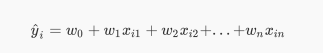
$\omega$被统称为模型的参数，其中$\omega_0$被称为截距(intercept)，$\omega_1$~$\omega_n$被称为回归系数(regression coefficient)，有时也是使⽤$\theta$或者$\beta$来表示。这个表达式，其实就和我们⼩学时就⽆⽐熟悉的$y=ax+b$是同样的性质。其中$y$是我们的⽬标变量，也就是标签。$ x_{i1} $ ~ $ x_{in} $是样本$i$上的特征不同特征。如果考虑我们有m个样本，则回归结果可以被写作：

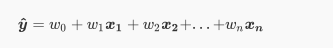

其中$y$是包含了m个全部的样本的回归结果的列向量（结构为(m,1)，由于只有⼀列，以列的形式表示，所以叫做列向量）。注意，我们通常使⽤粗体的⼩写字⺟来表示列向量，粗体的⼤写字⺟表示矩阵或者⾏列式。我们可以使⽤矩阵来表示这个⽅程，其中$\omega$可以被看做是⼀个结构为(n+1,1)的列矩阵，$X$是⼀个结构为(m,n+1)的特征矩阵，则有：
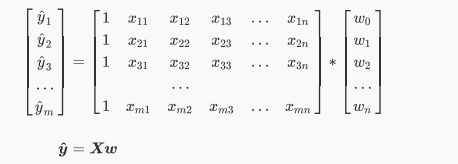

线性回归的任务，就是构造⼀个预测函数来映射输⼊的特征矩阵$X$和标签值$y$的线性关系，这个预测函数在不同的教材上写法不同，可能写作$f(x)$，$y_w(x)$，或者$h(x)$等等形式，但⽆论如何，这个预测函数的本质就是我们需要构建的模型。

模型：模型是机器学习算法建⽴的，⽤于帮助算法实现预测或实现判断的⼀个存在。

对于线性回归⽽⾔，预测函数 $\hat{y}=\mathbf{X}\mathbf{\omega}$ 就是我们的模型，⽽其中只有$\omega$是未知的，所以线性回归原理的核⼼就是找出模型的参数向量$\omega$。但我们怎样才能够求解出参数向量呢？我们需要依赖⼀个重要概念：损失函数。

在学习KNN时，我们曾经提到过两种模型表现：在训练集上的表现，和在测试集上的表现。我们建模，是追求模型在测试集上的表现最优，因此模型的评估指标往往是⽤来衡量模型在测试集上的表现的。然⽽，线性回归有着基于训练数据求解参数$\omega$的需求，并且希望训练出来的模型能够尽可能地拟合训练数据，即模型在训练集上的预测准确率越靠近100%越好。

因此，我们使⽤”损失函数“这个评估指标，来衡量系数为$\omega$的模型拟合训练集时产⽣的信息损失的⼤⼩，并以此衡量参数$\omega$的优劣

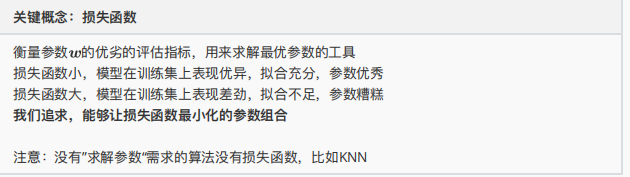

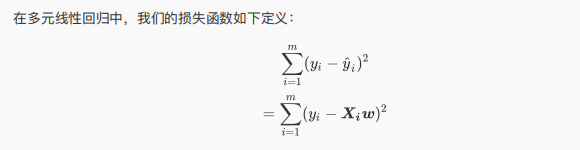
其中$y_i$是样本$i$对应的真实标签，$\hat{y}_i$也就是 $\mathbf{X}_i\mathbf{\omega}$ 是样本$i$在⼀组参数$\mathbf{\omega}$下的预测标签，$m$代表样本的总量。

在这个平⽅结果下，我们的$y$和$\hat{y}$分别是我们的真实标签和预测值，也就是说，这个损失函数实在计算我们的真实标签和预测值之间的距离。因此，我们认为这个损失函数衡量了我们构造的模型的预测结果和真实标签的差异，因此我们固然希望我们的预测结果和真实值差异越⼩越好。所以我们的求解⽬标就可以转化成：
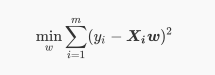

这个式⼦如果⽤矩阵，我们要如何表达呢？来看⼀个简单的例⼦。  
假设现在$\omega$为[1,2]这样⼀个向量，求解出的模型为$y=x_1 + 2x_2$。
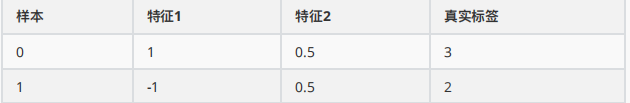

则我们的损失函数的值就是：
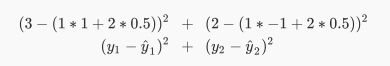

这样的形式如果⽤矩阵来表达，其实可以写成：
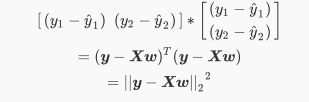

矩阵相乘是对应未知元素相乘相加，就会得到和上⾯的式⼦⼀模⼀样的结果。⽽这样的矩阵可以转变成**L2范式**的形式。我们往往称呼这个损失函数为SSE（Sum of Squared Error，误差平⽅和）或者RSS（Residual Sum of Squares 残差平⽅和）。在我们的课件中我们称之为RSS，残差平⽅和。

## 最⼩⼆乘法求解多元线性回归的参数

现在问题转换成了求解让RSS最⼩化的参数向量$\omega$，**这种通过最⼩化真实值和预测值之间的RSS来求解参数的⽅法叫做最⼩⼆乘法**。求解极值的第⼀步往往是求解⼀阶导数并让⼀阶导数等于0，最⼩⼆乘法也不能免俗。因此，我们现在残差平⽅和RSS上对参数向量$\mathbf{\omega}$求导。

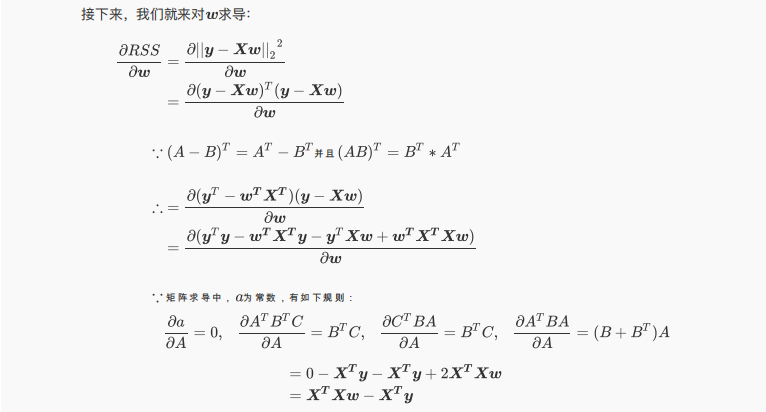
此处最后结果应改为：$=2(\mathbf{X}^T\mathbf{X}\mathbf{w} -\mathbf{X}^T\mathbf{y})$

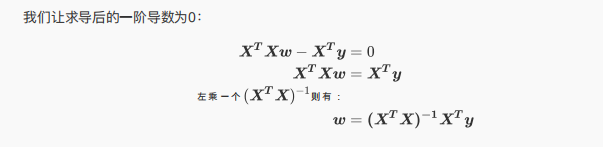
到了这⾥，我们希望能够将$\omega$留在等式的左边，其他与特征矩阵有关的部分都放到等式的右边，如此就可以求出$\omega$的最优解了。这个功能⾮常容易实现，只需要我们左乘$\mathbf{X}^T\mathbf{X}$的逆矩阵就可以。在这⾥，逆矩阵存在的充分必要条件是**特征矩阵不存在多重共线性**。我们将会在第下面节详细讲解多重共线性这个主题。

除了多元线性回归的推导之外，这⾥还需要提到⼀些在上⾯的推导过程中不曾被体现出来的问题。在统计学中，使⽤最⼩⼆乘法来求解线性回归的⽅法是⼀种”⽆偏估计“的⽅法，这种⽆偏估计要求因变量，也就是标签的分布必须服从正态分布。这是说，我们的y必须经由正太化处理（⽐如说取对数，或者使⽤QuantileTransformer或者PowerTransformer这些功能）。在机器学习中，我们会先考虑模型的效果，如果模型效果不好，那我们可能考虑改变因变量的分布。

## sklearn 实现

class sklearn.linear_model.LinearRegression (fit_intercept=True, normalize=False, copy_X=True,n_jobs=None)

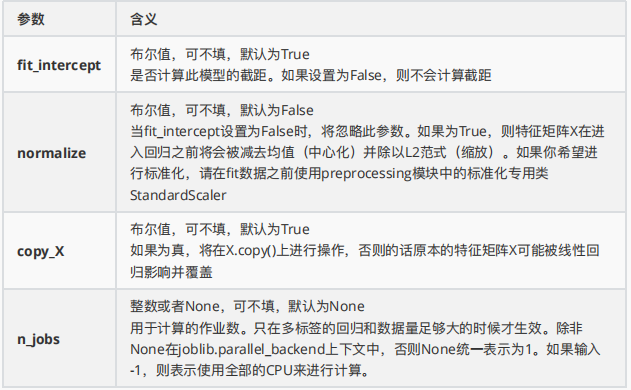

线性回归的类仅有四个参数就可以完成⼀个完整的算法。并且看得出，这些参数中并没有⼀个是必填的，更没有对我们的模型有不可替代作⽤的参数。这说明，线性回归的性能，往往取决于数据本身，⽽并⾮是我们的调参能⼒，线性回归也因此对数据有着很⾼的要求。幸运的是，现实中⼤部分连续型变量之间，都存在着或多或少的线性联系。所以线性回归虽然简单，却很强⼤。

顺便⼀提，sklearn中的线性回归可以处理多标签问题(一个样本对于多个标签)，只需要在fit的时候输⼊多维度标签就可以了。

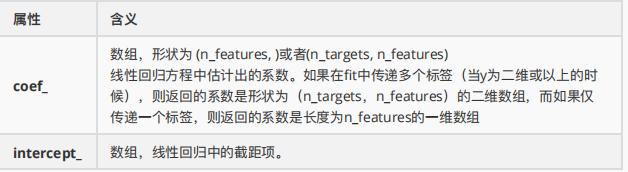

## 模型评估

回归类算法的模型评估⼀直都是回归算法中的⼀个难点，但不像我们曾经讲过的⽆监督学习算法中的轮廓系数等等评估指标，回归类与分类型算法的模型评估其实是相似的法则——找真实标签和预测值的差异。只不过在分类型算法中，这个差异只有⼀种⻆度来评判，那就是是否预测到了正确的分类，⽽在我
们的回归类算法中，我们有两种不同的⻆度来看待回归的效果：  
第⼀，我们是否预测到了正确的数值。  
第⼆，我们是否拟合到了⾜够的信息。  
这两种⻆度，分别对应着不同的模型评估指标。

### 是否预测了正确的数值

回忆⼀下我们的RSS残差平⽅和，它的本质是我们的预测值与真实值之间的差异，也就是从第⼀种⻆度来评估我们回归的效⼒，所以RSS既是我们的损失函数，也是我们回归类模型的模型评估指标之⼀。但是，RSS有着致命的缺点：它是⼀个⽆界的和，可以⽆限地⼤。我们只知道，我们想要求解最⼩的
RSS，从RSS的公式来看，它不能为负，所以RSS越接近0越好，但我们没有⼀个概念，究竟多⼩才算好，多接近0才算好？为了应对这种状况，sklearn中使⽤RSS的变体，均⽅误差MSE（mean squared error）来衡量我们的预测值和真实值的差异：
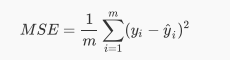

均⽅误差，本质是在RSS的基础上除以了样本总量，得到了每个样本量上的平均误差。有了平均误差，我们就可以将平均误差和我们的标签的取值范围在⼀起⽐较，以此获得⼀个较为可靠的评估依据。

- 在sklearn当中，我们有两种⽅式调⽤这个评估指标：  
⼀种是使⽤sklearn专⽤的模型评估模块metrics⾥的类mean_squared_error  
另⼀种是调⽤交叉验证的类cross_val_score并使⽤⾥⾯的scoring参数来设置使⽤均⽅误差。  

注意：但是sklearn中的参数scoring下，均⽅误差作为评判标准时，却是计算”负均⽅误差“（neg_mean_squared_error）。这是因为sklearn在计算
模型评估指标的时候，会考虑指标本身的性质，均⽅误差本身是⼀种误差，所以被sklearn划分为模型的⼀种损失(loss)。在sklearn当中，所有的损失都使⽤负数表示，因此均⽅误差也被显示为负数了。真正的均⽅误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。

除了MSE，我们还有与MSE类似的MAE（Mean absolute error，绝对均值误差）：
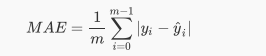
其表达的概念与均⽅误差完全⼀致，不过在真实标签和预测值之间的差异外我们使⽤的是L1范式（绝对值）。现实使⽤中，MSE和MAE选⼀个来使⽤就好了。在sklearn当中，我们使⽤命令fromsklearn.metrics import mean_absolute_error来调⽤MAE，同时，我们也可以使⽤交叉验证中的scoring = "neg_mean_absolute_error"，以此在交叉验证时调⽤MAE。

### 是否拟合了⾜够的信息

对于回归类算法⽽⾔，只探索数据预测是否准确是不⾜够的。除了数据本身的数值⼤⼩之外，我们还希望我们的模型能够捕捉到数据的”规律“，⽐如数据的分布规律，单调性等等，⽽是否捕获了这些信息并⽆法使⽤MSE来衡量。

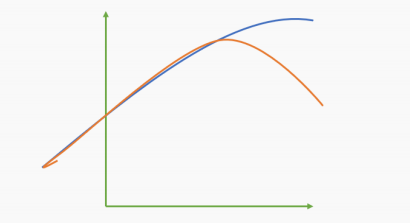

来看这张图，其中红⾊线是我们的真实标签，⽽蓝⾊线是我们的拟合模型。这是⼀种⽐较极端，但的确可能发⽣的情况。这张图像上，前半部分的拟合⾮常成功，看上去我们的真实标签和我们的预测结果⼏乎重合，但后半部分的拟合却⾮常糟糕，模型向着与真实标签完全相反的⽅向去了。对于这样的⼀个拟
合模型，如果我们使⽤MSE来对它进⾏判断，它的MSE会很⼩，因为⼤部分样本其实都被完美拟合了，少数样本的真实值和预测值的巨⼤差异在被均分到每个样本上之后，MSE就会很⼩。但这样的拟合结果必然不是⼀个好结果，因为⼀旦我的新样本是处于拟合曲线的后半段的，我的预测结果必然会有巨⼤的
偏差，⽽这不是我们希望看到的。所以，我们希望找到新的指标，除了判断预测的数值是否正确之外，还能够判断我们的模型是否拟合了⾜够多的，数值之外的信息。

在我们学习降维算法PCA的时候，我们提到我们使⽤⽅差来衡量数据上的信息量。如果⽅差越⼤，代表数据上的信息量越多，⽽这个信息量不仅包括了数值的⼤⼩，还包括了我们希望模型捕捉的那些规律。为了衡量模型对数据上的信息量的捕捉，我们定义了 来帮助我们：
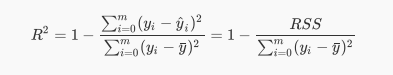

其中$y$是我们的真实标签，$\hat{y}$是我们的预测结果，$\overline{y}$是我们的均值，$y_i-\overline{y}$如果除以样本量m就是我们的⽅差。⽅差的本质是任意⼀个$\hat{y}$值和样本均值的差异，差异越⼤，这些值所带的信息越多。在$R^2$中，分⼦是真实值和预测值之差的差值，也就是我们的模型没有捕获到的信息总量，分⺟是真实标签所带的信息量，所以其衡量的是1 - 我们的模型没有捕获到的信息量占真实标签中所带的信息量的⽐例，所以，越接近1越好。(一般60%-80%)

- $R^2$可以使⽤三种⽅式来调⽤  
第⼀种是直接从metrics中导⼊r2_score，输⼊预测值和真实值后打分。  
第⼆种是直接从线性回归LinearRegression的接⼝score来进⾏调⽤。  
第三种是在交叉验证中，输⼊"r2"来调⽤。  

注意：指标的参数中，先查看其用法，是输入真实值还是预测值  

如果模型对数据拟合非常糟糕，低于50%甚至负值模型就不能用了  

$R^2$ 为负的情形：
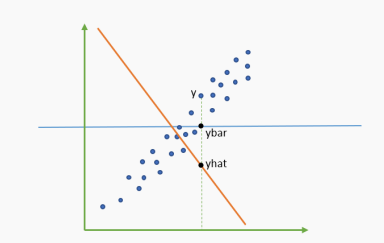

此时，⾸先检查你的建模过程和数据处理过程是否正确；如果是集成模型的回归，检查你的弱评估器的数量是否不⾜，随机森林，提升树这些模型在只有两三棵树的时候很容易出现负的 。如果你检查了所有的代码，也确定了你的预处理没有问题，但你的 也还是负的，那这就证明，线性回归模型不适合你的数
据，试试看其他的算法吧。

# 多重共线性与解决办法

## 多重共线性的定义

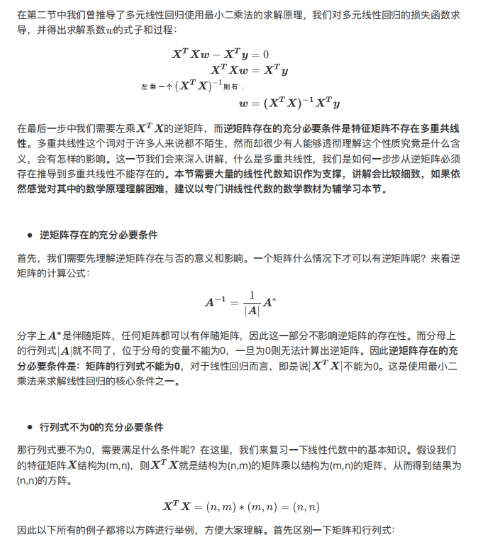

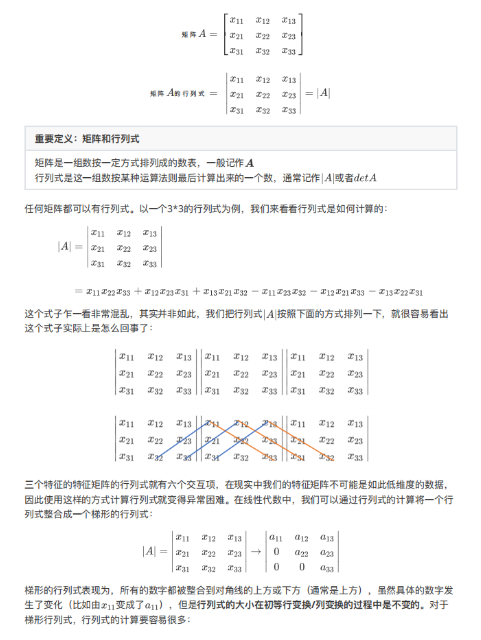

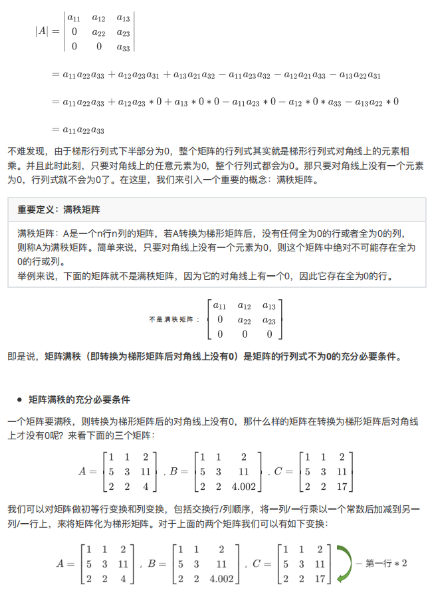

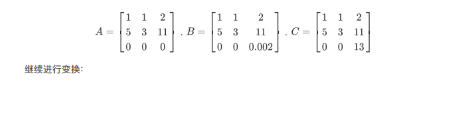

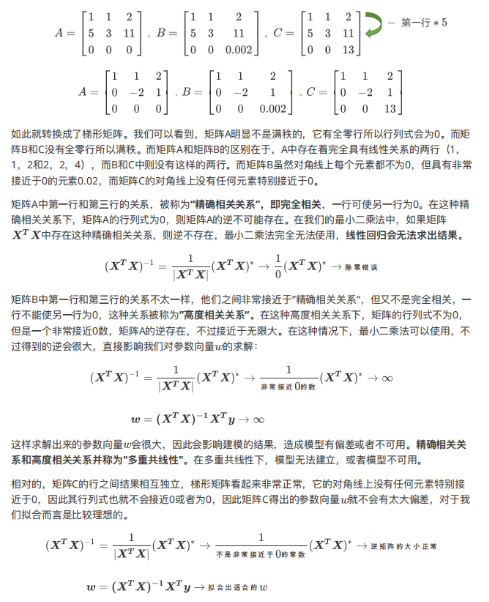

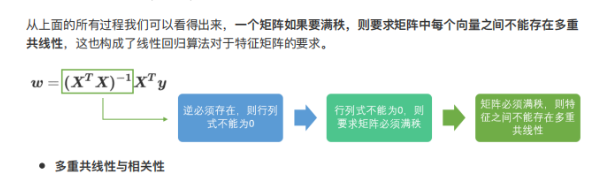

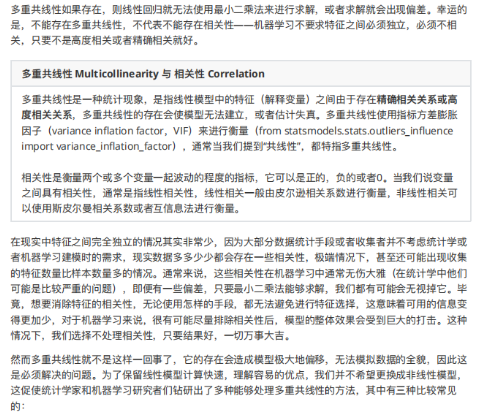

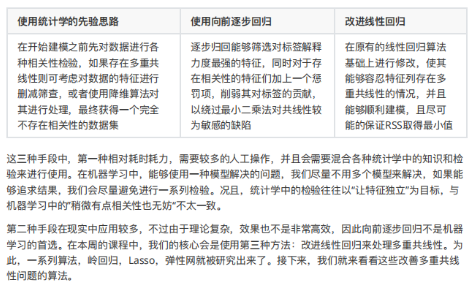

## 岭回归

## lasso

本章之中，⼤家学习了多元线性回归，岭回归，Lasso三个算法，他们都是围绕着原始的线性回归进⾏的拓展和改进。其中岭回归和Lasso是为了解决多元线性回归中使⽤最⼩⼆乘法的各种限制，主要⽤途是消除多重共线性带来的影响并且做特征选择。除此之外，本章还定义了多重共线性和各种线性相关的
概念，并为⼤家补充了⼀些线性代数知识。回归算法属于原理简单，但操作困难的机器学习算法，在实践和理论上都还有很⻓的路可以⾛，希望⼤家继续探索，让线性回归⼤家族中的算法真正称为⼤家的武器。